### Business Goal 

 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [3]:
#loading data
house_info = pd.read_csv("train.csv")
house_info.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Exploration

In [4]:
house_info.shape

(1460, 81)

In [5]:
#Checking null percentage for all the attributes
Missing_Per_of_attributes = pd.DataFrame({'Percent_Of_Missing_value':round(100*(house_info.isnull().sum()/len(house_info.index)), 2)})
Missing_Per_of_attributes

,Percent_Of_Missing_value
Id,0.00
MSSubClass,0.00
MSZoning,0.00
LotFrontage,17.74
LotArea,0.00
Street,0.00
Alley,93.77
LotShape,0.00
LandContour,0.00
Utilities,0.00


In [6]:
house_info.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
house_info.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

In [8]:
#list of attributes contain null values
from pandas.api.types import is_string_dtype

num_null_attributes = []
object_null_attributes = []

for col in house_info.columns:
    if round(100*(house_info[col].isnull().sum()/len(house_info.index)), 2)>0:
        if is_string_dtype(house_info[col]) == True:
            object_null_attributes.append(col)
        
        else:
            num_null_attributes.append(col)

In [9]:
print("********************************* Object null data *******************************************") 
print(object_null_attributes)
print('\n')
print("********************************* Num null data *******************************************") 
print(num_null_attributes)

********************************* Object null data *******************************************
['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


********************************* Num null data *******************************************
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


## Data Preprocessing

### Filling all the null values

#### For String attributes

##### Replacing NA value for Alley

In [10]:
#replacing NA=>No 
house_info['Alley'].fillna('No Alley access', inplace=True)

##### Replacing NA values for Basements

In [11]:
house_info['BsmtQual'].fillna('No Basement', inplace=True)
house_info['BsmtCond'].fillna('No Basement', inplace=True)
house_info['BsmtExposure'].fillna('No Basement', inplace=True)
house_info['BsmtFinType1'].fillna('No Basement', inplace=True)
house_info['BsmtFinType2'].fillna('No Basement', inplace=True)

##### Replacing NA values for Garage

In [12]:
house_info['GarageQual'].fillna('No Garage', inplace=True)
house_info['GarageCond'].fillna('No Garage', inplace=True)
house_info['GarageFinish'].fillna('No Garage', inplace=True)
house_info['GarageType'].fillna('No Garage', inplace=True)

##### Replacng NA values for MasVnrType

In [13]:
house_info['MasVnrType'].replace({np.nan:'None'},inplace=True)

##### Replacing NA values for FireplaceQU

In [14]:
house_info['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)

##### Replacing NA values for Electrical

In [15]:
house_info['Electrical'] = house_info['Electrical'].replace(np.nan, house_info['Electrical'].mode()[0])

##### Replacing NA values for PoolQC

In [16]:
house_info['PoolQC'].replace({np.nan:'No Pool'},inplace=True)

##### Replacing NA values for Fence

In [17]:
house_info['Fence'].replace({np.nan:'No Fence'},inplace=True)

##### Replacing NA values for MiscFeature

In [18]:
house_info['MiscFeature'].replace({np.nan:'None'},inplace=True)

## For Neumeric column

In [19]:
#Checking if there is any outlier LotFrontage
house_info['LotFrontage'].quantile([.1, .25, .5, .75, .95, .99])

0.10     44.0
0.25     59.0
0.50     69.0
0.75     80.0
0.95    107.0
0.99    141.0
Name: LotFrontage, dtype: float64

In [20]:
#Checking if there is any outlier MasVnrArea
house_info['MasVnrArea'].quantile([.1, .25, .5, .75, .95, .99])

0.10      0.00
0.25      0.00
0.50      0.00
0.75    166.00
0.95    456.00
0.99    791.92
Name: MasVnrArea, dtype: float64

As both attribute contain outlier we will replace the missing value with median

In [21]:
house_info['LotFrontage'] = house_info['LotFrontage'].fillna(house_info.LotFrontage.median())
house_info['MasVnrArea'] = house_info['MasVnrArea'].replace(np.nan, house_info['MasVnrArea'].median())

In [22]:
#Filling null value for year as 0
house_info['GarageYrBlt'] = house_info['GarageYrBlt'].fillna(0)

In [23]:
#Checking again if any atrribute contain null value or not
list1 = []

for col in house_info.columns:
    if round(100*(house_info[col].isnull().sum()/len(house_info.index)), 2)>0:
        list1.append(house_info[col])
        
if len(list1) ==0:
    print("There is no missing value in the attribute")
    
else:
    print(list1)

There is no missing value in the attribute


If a attribute contain 80% same value then the attribute is not that much necessary for the model

In [24]:
# Drop the following columns that have more than 80% values associated to a specific value



def CategoricalValueCounts():
    """
    Method to get the string column names that have count of one value more than 80%
    """
    
    column = []
    categorical_columns = house_info.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(house_info[col].value_counts().max() >= 1168):
            column.append(col)
    return column

columnsToBeRemoved_cat = CategoricalValueCounts()

# Remove the columns with skewed data

house_info.drop(columnsToBeRemoved_cat, axis = 1, inplace = True)

house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,2008,250000


In [25]:
#all the string attribtes that contain around 80% same value
print("***************** Categorical columns that are removed**********************")
columnsToBeRemoved_cat

***************** Categorical columns that are removed**********************


['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
# Drop the following columns that have more than 80% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def NumericalValueCounts():
    """
    Method to get the neumerical column names that have count of one value more than 80%
    """
    
    column = []
    numerical_columns = house_info.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(house_info[col].value_counts().max() >= 1168):
            column.append(col)
    return column

columnsToBeRemoved_num = NumericalValueCounts()
house_info.drop(columnsToBeRemoved_num, axis = 1, inplace = True)

house_info.drop(['MoSold'], axis = 1, inplace = True)

house_info.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,2008,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,250000


In [27]:
print("***************** Neumerical columns that are removed**********************")
columnsToBeRemoved_num

***************** Neumerical columns that are removed**********************


['BsmtFinSF2',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [28]:
house_info.drop(['Id'], axis = 1, inplace = True)

In [29]:
#converting year to age

house_info['YearBuilt'] = 2021 - house_info['YearBuilt']
house_info['YearRemodAdd'] = 2021 - house_info['YearRemodAdd']
house_info['GarageYrBlt'] = 2021 - house_info['GarageYrBlt']
house_info['YrSold'] = 2021 - house_info['YrSold']

In [30]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns

house_info.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

## Data Visualization

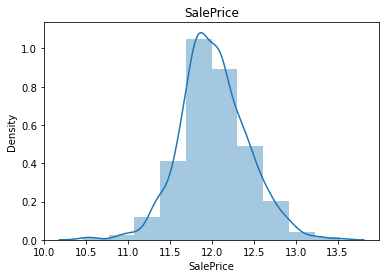

In [31]:
house_info['SalePrice'] = np.log1p(house_info['SalePrice'])

plt.title('SalePrice')
sns.distplot(house_info['SalePrice'], bins=10)
plt.show()

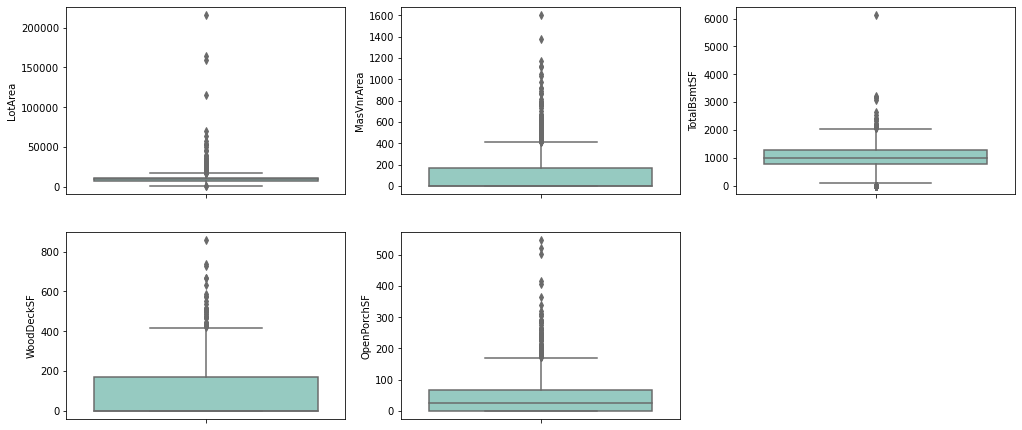

In [32]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = house_info)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = house_info)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = house_info)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = house_info)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = house_info)
plt.show()

In [33]:
# Removing Outliers

# Removing values beyond 98% for LotArea

nn_quartile_LotArea = house_info['LotArea'].quantile(0.98)
housingInfo = house_info[house_info["LotArea"] < nn_quartile_LotArea]

# Removing values beyond 98% for MasVnrArea

nn_quartile_MasVnrArea = house_info['MasVnrArea'].quantile(0.98)
housingInfo = house_info[house_info["MasVnrArea"] < nn_quartile_MasVnrArea]

# Removing values beyond 99% for TotalBsmtSF

nn_quartile_TotalBsmtSF = house_info['TotalBsmtSF'].quantile(0.99)
housingInfo = house_info[house_info["TotalBsmtSF"] < nn_quartile_TotalBsmtSF]

# Removing values beyond 99% for WoodDeckSF

nn_quartile_WoodDeckSF = house_info['WoodDeckSF'].quantile(0.99)
housingInfo = house_info[house_info["WoodDeckSF"] < nn_quartile_WoodDeckSF]

# Removing values beyond 99% for OpenPorchSF

nn_quartile_OpenPorchSF = house_info['OpenPorchSF'].quantile(0.99)
housingInfo = house_info[house_info["OpenPorchSF"] < nn_quartile_OpenPorchSF]

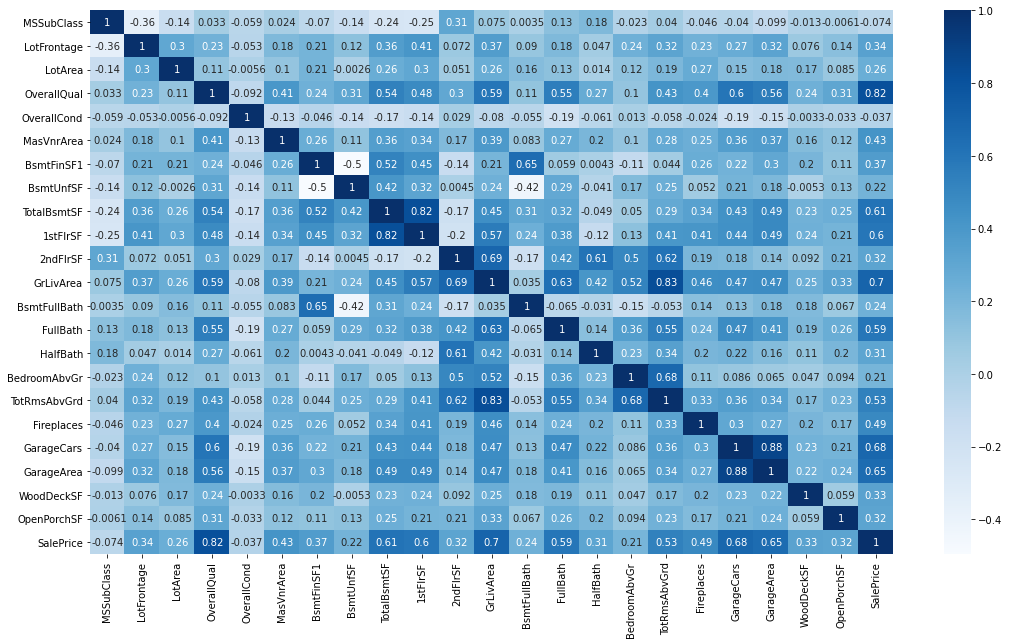

In [34]:
plt.figure(figsize=(18,10))

cor = house_info.corr()
# heatmap
sns.heatmap(cor, annot=True, cmap = "Blues")
plt.show()

We will drop the attributs which have correlation >=60%

In [35]:
#Create correlation matrix
corr_matrix = house_info.corr().abs()

#Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

In [36]:
to_drop

['1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [37]:
house_info2 = house_info.drop(to_drop, axis = 1)

In [38]:
house_info2.shape

(1460, 33)

## Data Preperation

In [39]:
#converting from int type to object to treat the variables as categorical variables
house_info2['MSSubClass'] = house_info2['MSSubClass'].astype('object')
house_info2['OverallQual'] = house_info2['OverallQual'].astype('object')
house_info2['OverallCond'] = house_info2['OverallCond'].astype('object')
house_info2['BedroomAbvGr'] = house_info2['BedroomAbvGr'].astype('object')
house_info2['Fireplaces'] = house_info2['Fireplaces'].astype('object')

In [40]:
house_info2.shape

(1460, 33)

In [41]:
# creating dummy variables for categorical variables

# subset all categorical variables
house_categorical = house_info2.select_dtypes(include=['object'])
house_categorical.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish
0,60,RL,Reg,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,3,Gd,0,No Fireplace,Attchd,RFn
1,20,RL,Reg,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,3,TA,1,TA,Attchd,RFn
2,60,RL,IR1,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,3,Gd,1,TA,Attchd,RFn
3,70,RL,IR1,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,3,Gd,1,Gd,Detchd,Unf
4,60,RL,IR1,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,4,Gd,1,TA,Attchd,RFn


In [42]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,

In [43]:
house_info2 = house_info2.drop(list(house_categorical.columns), axis = 1)

In [44]:
house_info2 = pd.concat([house_info2, house_dummies], axis = 1)

In [45]:
house_info2.shape

(1460, 172)

In [46]:
X = house_info2
Y = np.log(house_info['SalePrice'])

In [47]:
# scaling the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [48]:
# split into train and test

from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size = 0.3, random_state=42)

## Model Building and feature selection

## Linear Regression

In [49]:
# Running RFE with the output number of the variable equal to 50
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 30)            
rfe = rfe.fit(X_train, y_train)

In [50]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [51]:
#accuracy of linear regressio on test data
lm.score(X_test, y_test)

0.8570419949762643

In [52]:
#r2_score of test data
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train, multioutput='variance_weighted')

0.9017761711343938

In [53]:
#r2_score of test data
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test, multioutput='variance_weighted')

0.8570419949762643

In [54]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 50 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,MSSubClass_30,True,1
1,MSSubClass_160,True,1
2,MSSubClass_180,True,1
3,MSZoning_FV,True,1
4,MSZoning_RL,True,1
5,Neighborhood_ClearCr,True,1
6,Neighborhood_NoRidge,True,1
7,HouseStyle_2.5Fin,True,1
8,OverallQual_3,True,1
9,OverallQual_4,True,1


In [55]:
X_train_rfe = X_train[col]

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

In [56]:
# from sklearn.metrics import r2_score, mean_squared_error, make_scorer

# #scorer that computes MSE score and R2 score

# def MSE(y_true,y_pred):
#     mse = mean_squared_error(y_true, y_pred)
#     return mse

# def R2(y_true,y_pred):    
#     r2 = r2_score(y_true, y_pred)
#     return r2

# def two_score(y_true,y_pred):    
#     MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
#     score = R2(y_true,y_pred)
#     return score

# def two_scorer():
#     return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

## Ridge Regression

In [57]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [58]:
ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]

In [60]:
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0038,0.003598,0.001200,0.000400,0.0001,{'alpha': 0.0001},-0.014858,-0.015501,-0.016232,-0.014255,-0.015120,-0.015193,0.000659,4,-0.014565,-0.014424,-0.014244,-0.014724,-0.014522,-0.014496,0.000159
1,0.0024,0.000490,0.001800,0.000401,0.001,{'alpha': 0.001},-0.014858,-0.015502,-0.016224,-0.014255,-0.015120,-0.015192,0.000657,3,-0.014565,-0.014424,-0.014244,-0.014724,-0.014522,-0.014496,0.000159
2,0.0028,0.000400,0.001219,0.000439,0.01,{'alpha': 0.01},-0.014853,-0.015514,-0.016163,-0.014257,-0.015125,-0.015182,0.000639,1,-0.014565,-0.014425,-0.014246,-0.014724,-0.014522,-0.014496,0.000158
3,0.0020,0.000632,0.001201,0.000400,0.05,{'alpha': 0.05},-0.014837,-0.015569,-0.016114,-0.014268,-0.015144,-0.015186,0.000628,2,-0.014574,-0.014434,-0.014269,-0.014733,-0.014530,-0.014508,0.000154
4,0.0018,0.000400,0.001400,0.000490,0.1,{'alpha': 0.1},-0.014821,-0.015634,-0.016211,-0.014280,-0.015165,-0.015222,0.000663,5,-0.014595,-0.014453,-0.014303,-0.014752,-0.014549,-0.014530,0.000149


In [61]:
#checking the value of optimum number of parameters
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.01}
-0.01518249513920369


In [62]:
ridge_model = Ridge(alpha = ridge_model_cv.best_params_.get("alpha"))
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [63]:
print("******************R2 Score of train data*********************")
ypred1 = ridge_model.predict(X_train)
print(r2_score(y_train, ypred1, multioutput='variance_weighted'))
print("******************R2 Score of test data*********************")
ypred2 = ridge_model.predict(X_test)
print(r2_score(y_test, ypred2, multioutput='variance_weighted'))

******************R2 Score of train data*********************
0.8024982991203793
******************R2 Score of test data*********************
0.7726509793335744


In [64]:
# Check the mean squared error

mean_squared_error(y_test, ridge_model.predict(X_test))

0.00026666460790787514

In [65]:
#accuracy of ridge regression on test data
ridge_model.score(X_test, y_test)

0.7726509793335744

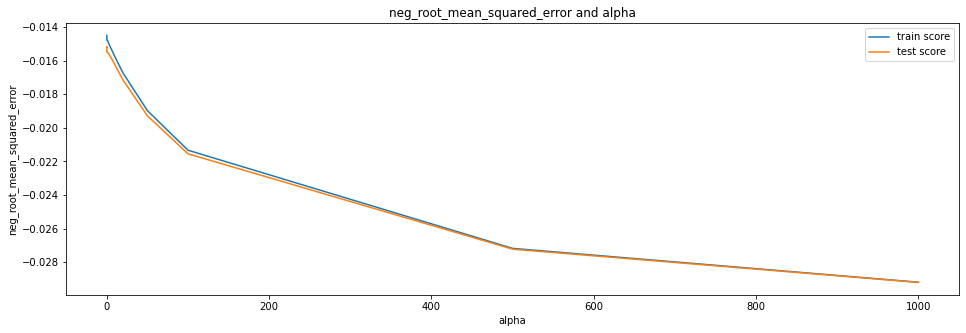

In [66]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_root_mean_squared_error')
plt.title("neg_root_mean_squared_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [67]:
ridge_coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient':ridge_model.coef_.round(4)})
ridge_coeff_df.reset_index(drop = True, inplace = True)
ridge_coeff_df

,Feature,Coefficient
0,MSSubClass_30,-0.0176
1,MSSubClass_160,-0.0147
2,MSSubClass_180,-0.0162
3,MSZoning_FV,0.0148
4,MSZoning_RL,0.0128
5,Neighborhood_ClearCr,0.0187
6,Neighborhood_NoRidge,0.0192
7,HouseStyle_2.5Fin,0.0210
8,OverallQual_3,0.0252
9,OverallQual_4,0.0365


In [68]:
#Creating a DataFrame with top 10 predictors
top_10_attribute = ridge_coeff_df.sort_values(by =['Coefficient'], ascending = False).head(10)
top_10_attribute

,Feature,Coefficient
15,OverallQual_10,0.1012
14,OverallQual_9,0.0994
13,OverallQual_8,0.0876
12,OverallQual_7,0.0712
11,OverallQual_6,0.0582
10,OverallQual_5,0.0481
9,OverallQual_4,0.0365
19,Exterior1st_Stone,0.0326
27,BedroomAbvGr_8,0.0314
18,Exterior1st_CemntBd,0.0254


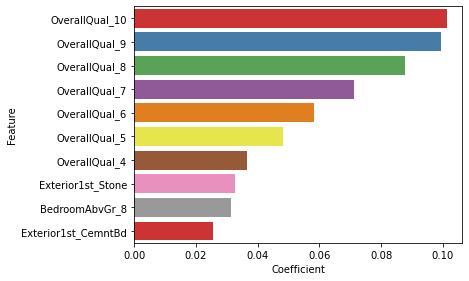

In [69]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = top_10_attribute)
plt.show()

## Lasso Regression

In [70]:
lasso = Lasso()



# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= "neg_root_mean_squared_error", 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [71]:
cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]

In [72]:
#checking the value of optimum number of parameters
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.01586859615595284


In [73]:
lasso_model = Lasso(alpha = lasso_model_cv.best_params_.get("alpha"))
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [74]:
print("******************R2 Score of train data*********************")
ypred1 = lasso_model.predict(X_train)
print(r2_score(y_train, ypred1, multioutput='variance_weighted'))
print("******************R2 Score of test data*********************")
ypred2 = lasso_model.predict(X_test)
print(r2_score(y_test, ypred2, multioutput='variance_weighted'))

******************R2 Score of train data*********************
0.7814372711114745
******************R2 Score of test data*********************
0.7577089099865123


In [75]:
# Check the mean squared error

mean_squared_error(y_test, lasso_model.predict(X_test))

0.00028419061726602765

In [76]:
#accuracy of lasso regression on test data
lasso_model.score(X_test, y_test)

0.7577089099865123

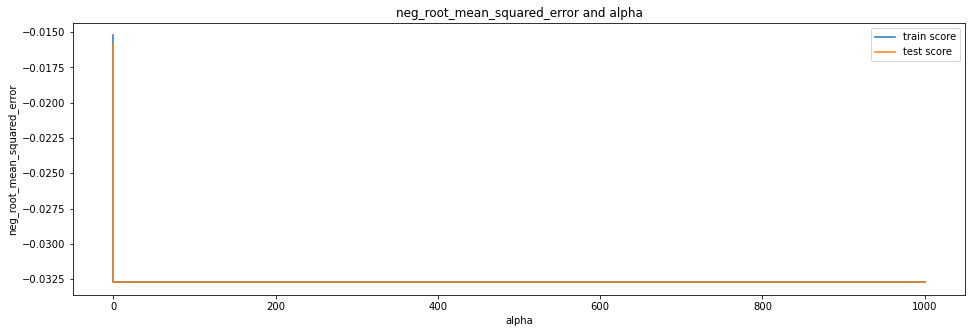

In [77]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_root_mean_squared_error')
plt.title("neg_root_mean_squared_error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [78]:
lasso_coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient':lasso_model.coef_.round(4)})
lasso_coeff_df.reset_index(drop = True, inplace = True)
lasso_coeff_df

,Feature,Coefficient
0,MSSubClass_30,-0.0190
1,MSSubClass_160,-0.0116
2,MSSubClass_180,-0.0013
3,MSZoning_FV,0.0112
4,MSZoning_RL,0.0124
5,Neighborhood_ClearCr,0.0133
6,Neighborhood_NoRidge,0.0156
7,HouseStyle_2.5Fin,0.0117
8,OverallQual_3,-0.0256
9,OverallQual_4,-0.0205


In [79]:
#Creating a dataframe with top 10 predictors
top_10_attribute_lasso = lasso_coeff_df.sort_values(by =['Coefficient'], ascending = False).head(10)
top_10_attribute_lasso

,Feature,Coefficient
14,OverallQual_9,0.0421
15,OverallQual_10,0.0405
13,OverallQual_8,0.0306
6,Neighborhood_NoRidge,0.0156
28,Fireplaces_2,0.0134
12,OverallQual_7,0.0134
5,Neighborhood_ClearCr,0.0133
4,MSZoning_RL,0.0124
7,HouseStyle_2.5Fin,0.0117
3,MSZoning_FV,0.0112


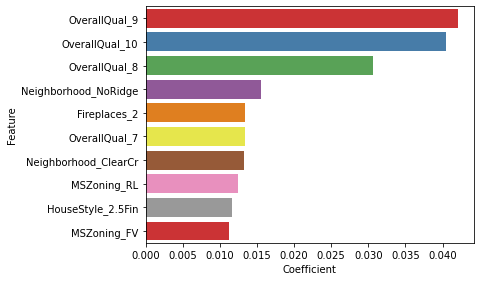

In [80]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coefficient', palette='Set1', data = top_10_attribute_lasso)
plt.show()